In [15]:
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
shap.initjs()



In [2]:
# Load a binary classification dataset (Breast Cancer dataset)
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Series(breast_cancer.target, name='target')


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [4]:
# Train a binary classification model (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Evaluate the model (optional)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9650


In [6]:
# Explain the model's predictions using SHAP
# For tree-based models like RandomForestClassifier, TreeExplainer is recommended
explainer = shap.TreeExplainer(model)


In [7]:
explainer

In [8]:
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)


In [9]:
shap_values

array([[[-1.70185901e-02,  1.70185901e-02],
        [-7.29122049e-03,  7.29122049e-03],
        [-8.75380096e-03,  8.75380096e-03],
        ...,
        [-7.76805425e-02,  7.76805425e-02],
        [-1.61427954e-03,  1.61427954e-03],
        [-2.04201512e-03,  2.04201512e-03]],

       [[ 3.36158520e-02, -3.36158520e-02],
        [ 8.82671416e-03, -8.82671416e-03],
        [ 1.82478138e-02, -1.82478138e-02],
        ...,
        [ 1.04235478e-01, -1.04235478e-01],
        [-4.24470063e-03,  4.24470063e-03],
        [-6.91857669e-04,  6.91857669e-04]],

       [[ 2.85891269e-02, -2.85891269e-02],
        [ 3.04538343e-05, -3.04538343e-05],
        [ 2.03829104e-02, -2.03829104e-02],
        ...,
        [ 9.43248337e-02, -9.43248337e-02],
        [-6.61136293e-05,  6.61136293e-05],
        [-7.31511732e-04,  7.31511732e-04]],

       ...,

       [[-6.33473763e-03,  6.33473763e-03],
        [-6.10976016e-03,  6.10976016e-03],
        [-2.30574637e-02,  2.30574637e-02],
        ...,
     

In [18]:
shap_values.shape, X_test.shape

((143, 30, 2), (143, 30))

Generating SHAP summary plot for class 1 (benign)...


<Figure size 640x480 with 0 Axes>

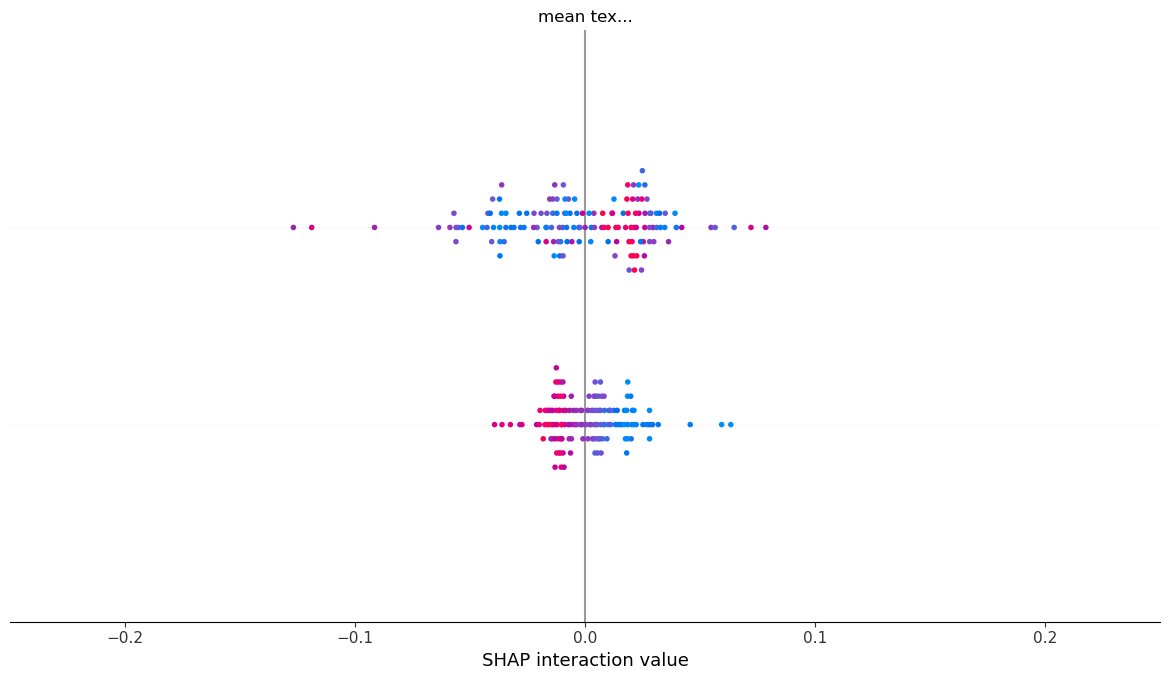

In [11]:
print("Generating SHAP summary plot for class 1 (benign)...")
shap.summary_plot(shap_values, X_test)


<Figure size 640x480 with 0 Axes>

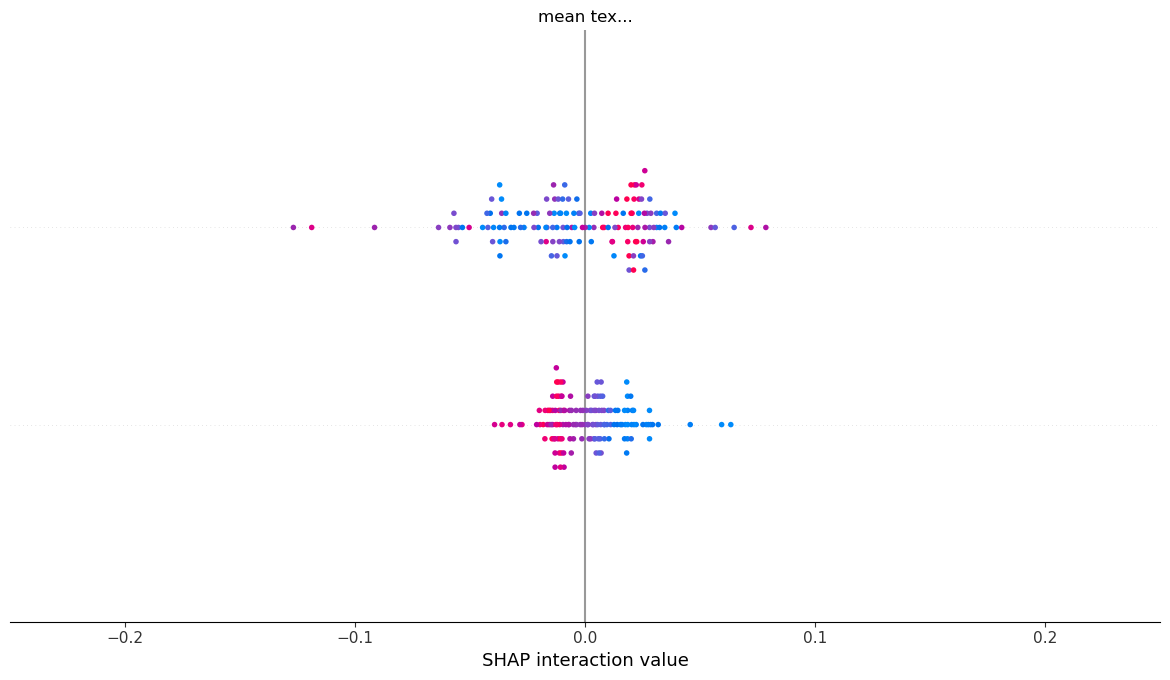

In [28]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

<Figure size 640x480 with 0 Axes>

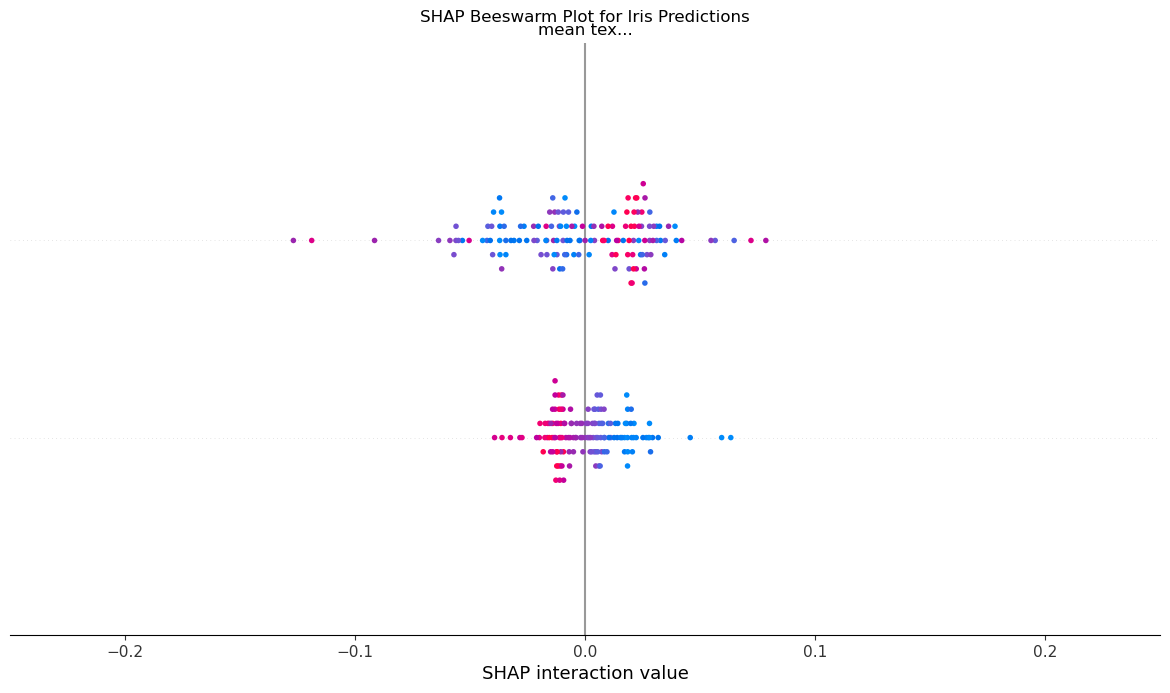

In [19]:
shap.summary_plot(shap_values, X_test, feature_names=breast_cancer.feature_names, show=False)

# Add a title
plt.suptitle("SHAP Beeswarm Plot for Iris Predictions", y=1.02)
plt.show()


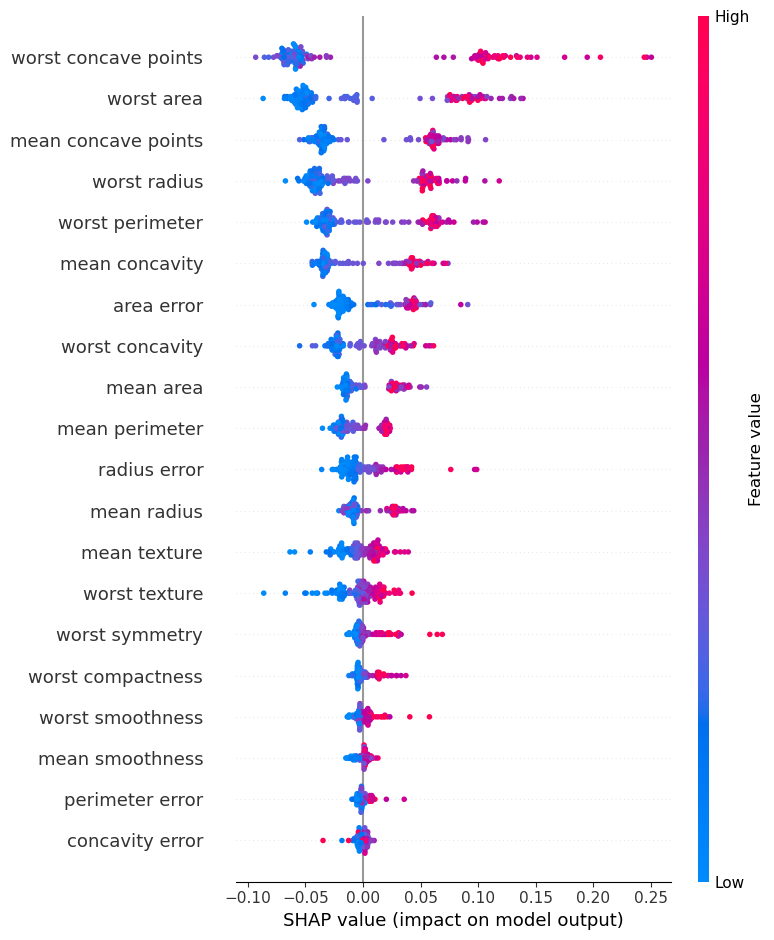

In [24]:
shap.summary_plot(shap_values[:,:,0], X_test)

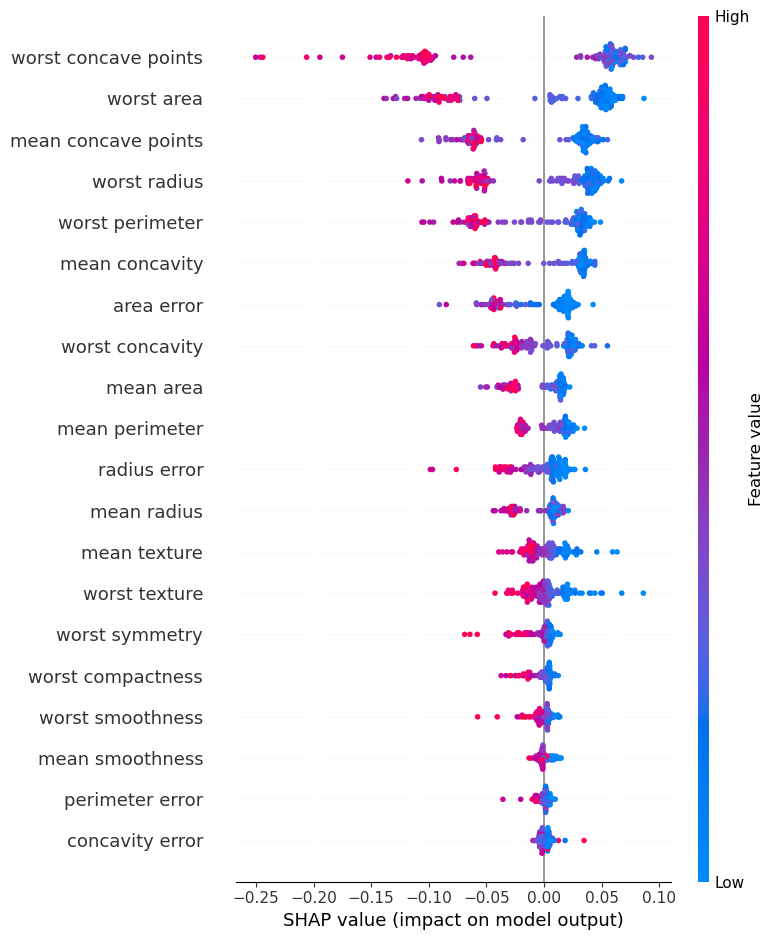

In [30]:
shap.summary_plot(shap_values[:,:,1], X_test)

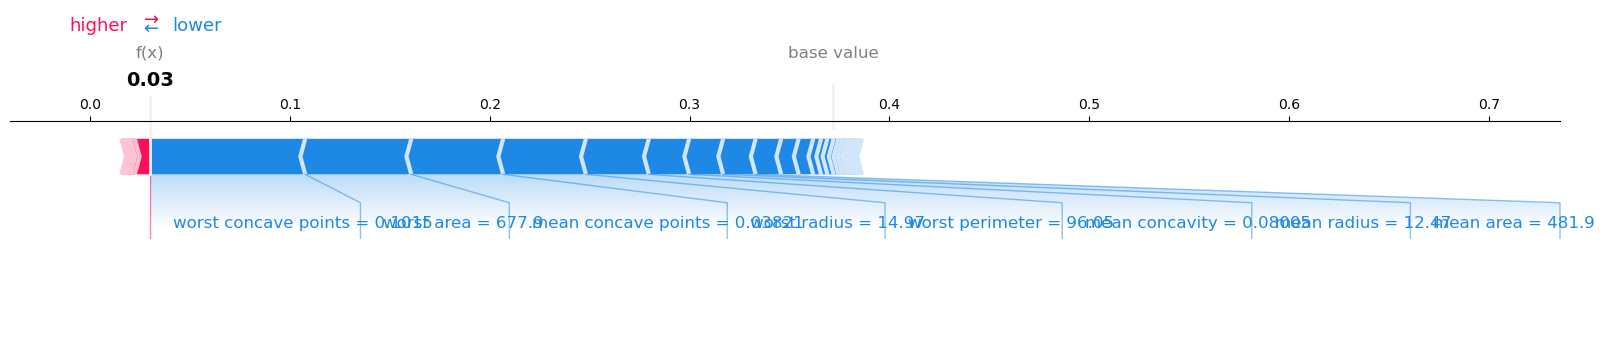

In [33]:
shap.plots.force(
    explainer.expected_value[0],          # Expected value for class 0
    shap_values[0, :, 0],                 # SHAP values for sample 0, class 0
    X_test.iloc[0, :],                     # Features for sample 0
    feature_names=breast_cancer.feature_names,
    matplotlib = True
)

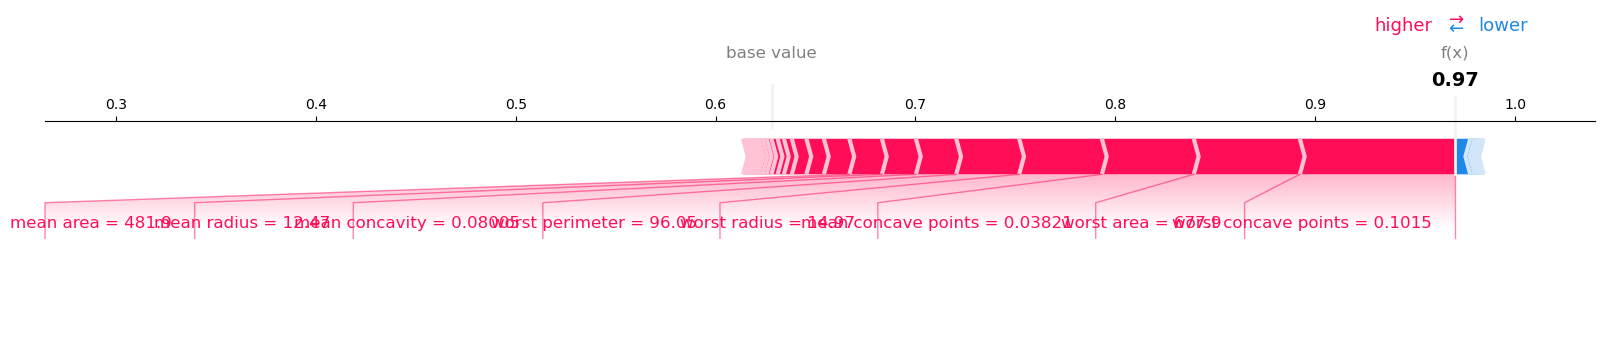

In [34]:
shap.plots.force(
    explainer.expected_value[1],          # Expected value for class 0
    shap_values[0, :, 1],                 # SHAP values for sample 0, class 0
    X_test.iloc[0, :],                     # Features for sample 0
    feature_names=breast_cancer.feature_names,
    matplotlib = True
)

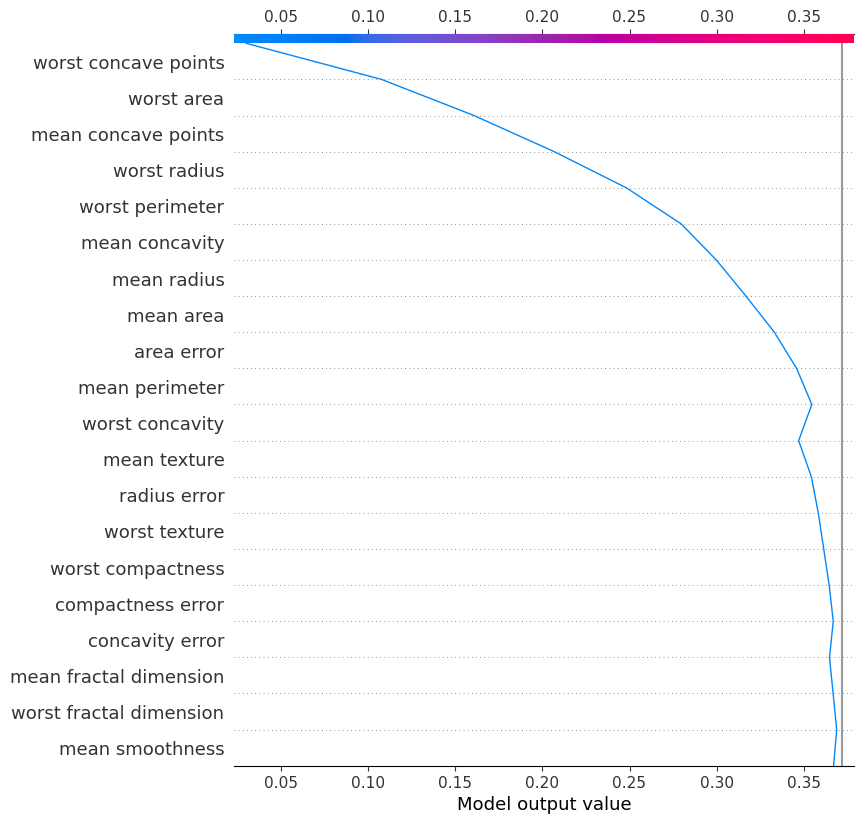

In [35]:
shap.decision_plot(explainer.expected_value[0], shap_values[0, :, 0], X_test.columns)

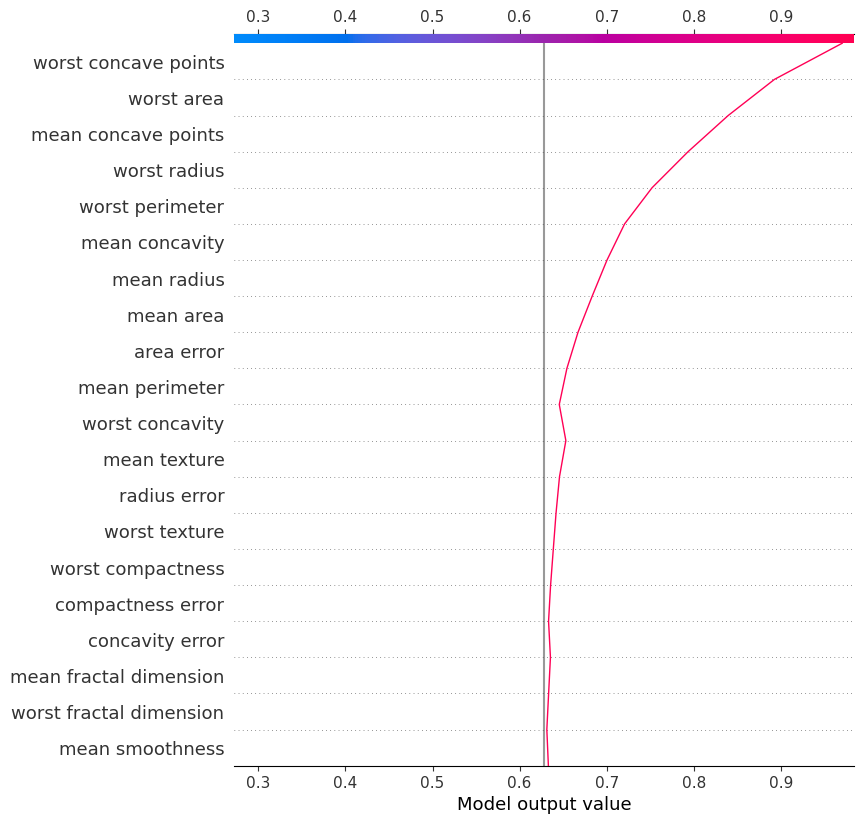

In [38]:
shap.decision_plot(explainer.expected_value[1], shap_values[0, :, 1], X_test.columns)

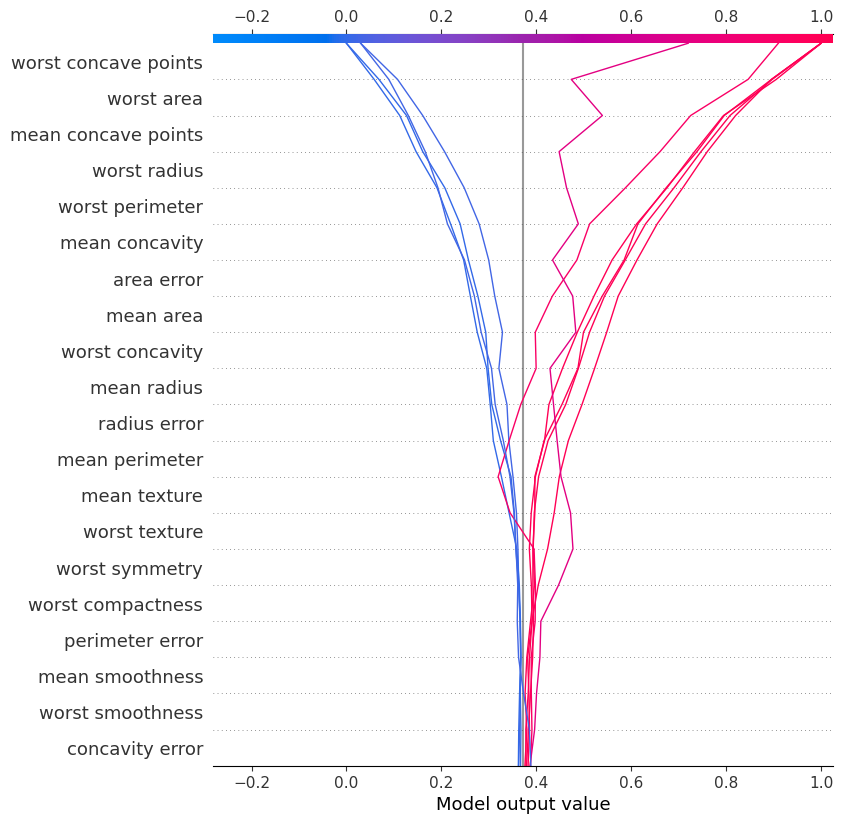

In [37]:
shap.plots.decision(
    explainer.expected_value[0],
    shap_values[:10, :, 0],  # First 10 samples
    feature_names=breast_cancer.feature_names
)
